In [41]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors

In [81]:
workdir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08'
inlet_path = f'{workdir}/camacity/dat/cty_prf_/prf_clrd0000.gl5'
cmask_path = f'{workdir}/camacity/dat/cty_msk_/city_clrd0000.gl5'
pop_path = f'{workdir}/global_city/dat/pop_tot_/GPW4ag__20100000.gl5'
rivout_path = f'{workdir}/global_city/dat/riv_out_/W5E5LR__20190000.gl5'
ctylst_path = f'{workdir}/camacity/dat/cty_lst_/create_text/camacity_seventh.txt'
aqdone_path = f'{workdir}/camacity/dat/cty_aqd_/100km_elevation/aqd_layer001.gl5'
aqdtwo_path = f'{workdir}/camacity/dat/cty_aqd_/100km_elevation/aqd_layer002.gl5'
aqdthree_path = f'{workdir}/camacity/dat/cty_aqd_/100km_elevation/aqd_layer003.gl5'
aqdfour_path = f'{workdir}/camacity/dat/cty_aqd_/100km_elevation/aqd_layer004.gl5'

In [82]:
latlen, lonlen = 2160, 4320
inlet = np.fromfile(inlet_path, dtype='float32').reshape(latlen, lonlen)
cmask = np.fromfile(cmask_path, dtype='float32').reshape(latlen, lonlen)
poptot = np.fromfile(pop_path, dtype='float32').reshape(latlen, lonlen)
rivout = np.fromfile(rivout_path, dtype='float32').reshape(latlen, lonlen)
aqd_one = np.fromfile(aqdone_path, dtype='float32').reshape(latlen, lonlen)
aqd_two = np.fromfile(aqdtwo_path, dtype='float32').reshape(latlen, lonlen)
aqd_three = np.fromfile(aqdthree_path, dtype='float32').reshape(latlen, lonlen)
aqd_four = np.fromfile(aqdfour_path, dtype='float32').reshape(latlen, lonlen)
with open(ctylst_path, 'r') as files:
    lst_lines = files.readlines()
invalid_cities = []
for ind in range(1860):
    line = lst_lines[ind]
    splt = line.split('|')
    parts = [item.strip() for item in splt]
    ovlp_flg = parts[2]
    dwn_flg = parts[3]
    if ovlp_flg=='RMVD' or dwn_flg=='NoMK':
       invalid_cities.append(ind+1)
print(f'len(invalid_cities): {len(invalid_cities)}')

len(invalid_cities): 256


In [29]:
for citynum in range(1, 5):
    inl_ind = np.where(inlet==citynum)
    ava = np.sum(rivout[inl_ind])
    ava_year = ava*60*60*24 # kg/s => little/day
    twenty = ava_year * 0.2
    print(f'citynum: {citynum}, ava: {twenty}')
    
    mask = np.where(cmask==citynum)
    citypop = np.sum(poptot[mask])
    print(f'citynum: {citynum}, citypop: {citypop}')

    mpcy = twenty/citypop
    print(f'citynum: {citynum}, mpcy: {mpcy}')

citynum: 1, ava: 7803334800.0
citynum: 1, citypop: 31821846.0
citynum: 1, mpcy: 245.21942567379654
citynum: 2, ava: 2429562870.0
citynum: 2, citypop: 22058266.0
citynum: 2, mpcy: 110.14296726678334
citynum: 3, ava: 8407998720.0
citynum: 3, citypop: 18339050.0
citynum: 3, mpcy: 458.47515111197146
citynum: 4, ava: 167684411.25
citynum: 4, citypop: 20178102.0
citynum: 4, mpcy: 8.310217246894679


In [37]:
cities_mask = np.where(cmask > 0)
world_citypop = np.sum(poptot[cities_mask])
world_pop = np.sum(poptot)
print(f'world total citypop in 2010 is {world_citypop/1e9} billion')
print(f'world total population in 2010 is {world_pop/1e9} billion')
print(f'ration of urban population {world_citypop/world_pop*1e2} %')

world total citypop in 2010 is 1.864510464 billion
world total population in 2010 is 6.92959232 billion
ration of urban population 26.906496286392212 %


# Table 1.

In [77]:
red = 0
orange = 0
yellow = 0
lightgreen = 0
green = 0

for citynum in range(1, 1861):
    if citynum not in invalid_cities:
        inl_ind = np.where(inlet==citynum)
        ava = np.sum(rivout[inl_ind])
        ava_year = ava*60*60*24 # kg/s => little/day
        twenty = ava_year * 0.2
        mask = np.where(cmask==citynum)
        citypop = np.sum(poptot[mask])
        lpdpc = twenty/citypop
        if lpdpc < 50:
            red += citypop
        elif 50 <= lpdpc and 100 > lpdpc:
            orange += citypop
        elif 100 <= lpdpc and 293 > lpdpc:
            yellow += citypop
        elif 293 <= lpdpc and 406 > lpdpc:
            lightgreen += citypop
        elif 406 <= lpdpc:
            green += citypop
        else:
            print(f'{citynum} is error, lpdpc {lpdpc} liter/day')
    else:
        print(f'{citynum} is in invalid_cities')

44 is in invalid_cities
152 is in invalid_cities
158 is in invalid_cities
168 is in invalid_cities
174 is in invalid_cities
225 is in invalid_cities
236 is in invalid_cities
237 is in invalid_cities
278 is in invalid_cities
283 is in invalid_cities
285 is in invalid_cities
310 is in invalid_cities
323 is in invalid_cities
356 is in invalid_cities
393 is in invalid_cities
409 is in invalid_cities
412 is in invalid_cities
422 is in invalid_cities
436 is in invalid_cities
449 is in invalid_cities
474 is in invalid_cities
477 is in invalid_cities
494 is in invalid_cities
500 is in invalid_cities
529 is in invalid_cities
538 is in invalid_cities
544 is in invalid_cities
555 is in invalid_cities
565 is in invalid_cities
572 is in invalid_cities
573 is in invalid_cities
574 is in invalid_cities
578 is in invalid_cities
581 is in invalid_cities
604 is in invalid_cities
623 is in invalid_cities
636 is in invalid_cities
675 is in invalid_cities
682 is in invalid_cities
684 is in invalid_cities
7

In [80]:
print(f'population under 50l/day: {red/1e6} million')
print(f'population under 100l/day: {(red+orange)/1e6} million')
print(f'population under 293l/day: {(red+orange+yellow)/1e6} million')
print(f'population under 406l/day: {(red+orange+yellow+lightgreen)/1e6} million')
print(f'population over 406l/day: {green/1e6} million')

population under 50l/day: 414.837110484375 million
population under 100l/day: 574.626835890625 million
population under 293l/day: 889.9472240117187 million
population under 406l/day: 984.0926348710938 million
population over 406l/day: 880.4178587773438 million


# Figure 1.

In [39]:
figure_one = np.zeros((2160, 4320))

for citynum in range(1, 1861):
    if citynum not in invalid_cities:
        inl_ind = np.where(inlet==citynum)
        ava = np.sum(rivout[inl_ind])
        ava_year = ava*60*60*24 # kg/s => little/day
        twenty = ava_year * 0.2
        mask = np.where(cmask==citynum)
        citypop = np.sum(poptot[mask])
        mpcy = twenty/citypop
        figure_one[mask] = mpcy
    else:
        print(f'{citynum} is in invalid_cities')

44 is in invalid_cities
152 is in invalid_cities
158 is in invalid_cities
168 is in invalid_cities
174 is in invalid_cities
225 is in invalid_cities
236 is in invalid_cities
237 is in invalid_cities
278 is in invalid_cities
283 is in invalid_cities
285 is in invalid_cities
310 is in invalid_cities
323 is in invalid_cities
356 is in invalid_cities
393 is in invalid_cities
409 is in invalid_cities
412 is in invalid_cities
422 is in invalid_cities
436 is in invalid_cities
449 is in invalid_cities
474 is in invalid_cities
477 is in invalid_cities
494 is in invalid_cities
500 is in invalid_cities
529 is in invalid_cities
538 is in invalid_cities
544 is in invalid_cities
555 is in invalid_cities
565 is in invalid_cities
572 is in invalid_cities
573 is in invalid_cities
574 is in invalid_cities
578 is in invalid_cities
581 is in invalid_cities
604 is in invalid_cities
623 is in invalid_cities
636 is in invalid_cities
675 is in invalid_cities
682 is in invalid_cities
684 is in invalid_cities
7

In [40]:
figureone_savepath = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/erl/out/figure_one.npy'
#np.save(figureone_savepath, figure_one)
#print(f'{figureone_savepath} is saved')

/mnt/c/Users/tsimk/Downloads/dotfiles/h08/erl/out/figure_one.npy is saved


In [75]:
def geography(west, east, south, north):
    resolution = 12
    upperindex = (90-north)*resolution
    lowerindex = (90-south)*resolution
    leftindex = (180+west)*resolution
    rightindex = (180+east)*resolution
    rgnshape = (lowerindex-upperindex, rightindex-leftindex)
    img_extent = (west, east, south, north)
    return upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent

def continent_plot(data, west, east, south, north):
    upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent = geography(west, east, south, north)
    data_cropped = data[upperindex:lowerindex, leftindex:rightindex]
    data_masked = np.ma.masked_where(data_cropped==0, data_cropped)
    
    bounds = [0, 50, 100, 292.85, 405.67, 500]
    cmap = plt.get_cmap('jet_r', len(bounds))
    cmap = mcolors.ListedColormap(['#e30d13', '#ff6600', '#ffcc00', '#ceed00', '#38a800'])
    norm = mcolors.BoundaryNorm(bounds, cmap.N)

    plt.rcParams["font.size"] = 50
    projection = ccrs.PlateCarree(central_longitude=0)
    fig, ax = plt.subplots(figsize=(40, 40), subplot_kw={'projection': projection})
    imd = ax.imshow(data_masked, 
                    cmap=cmap, norm=norm, extent=img_extent, transform=projection,
    )
    ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#eaeaea', zorder=-3)
    ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='#ffffff')
    ax.add_feature(cfeature.COASTLINE, linewidth=0.1, edgecolor='none', facecolor='#ffffff', zorder=-1)
    ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1.5, edgecolor='#d0cfd4', zorder=5)
    ax.gridlines(visible=False)
    cbar = fig.colorbar(imd, ax=ax, orientation='horizontal', pad=0.02)
    plt.show()

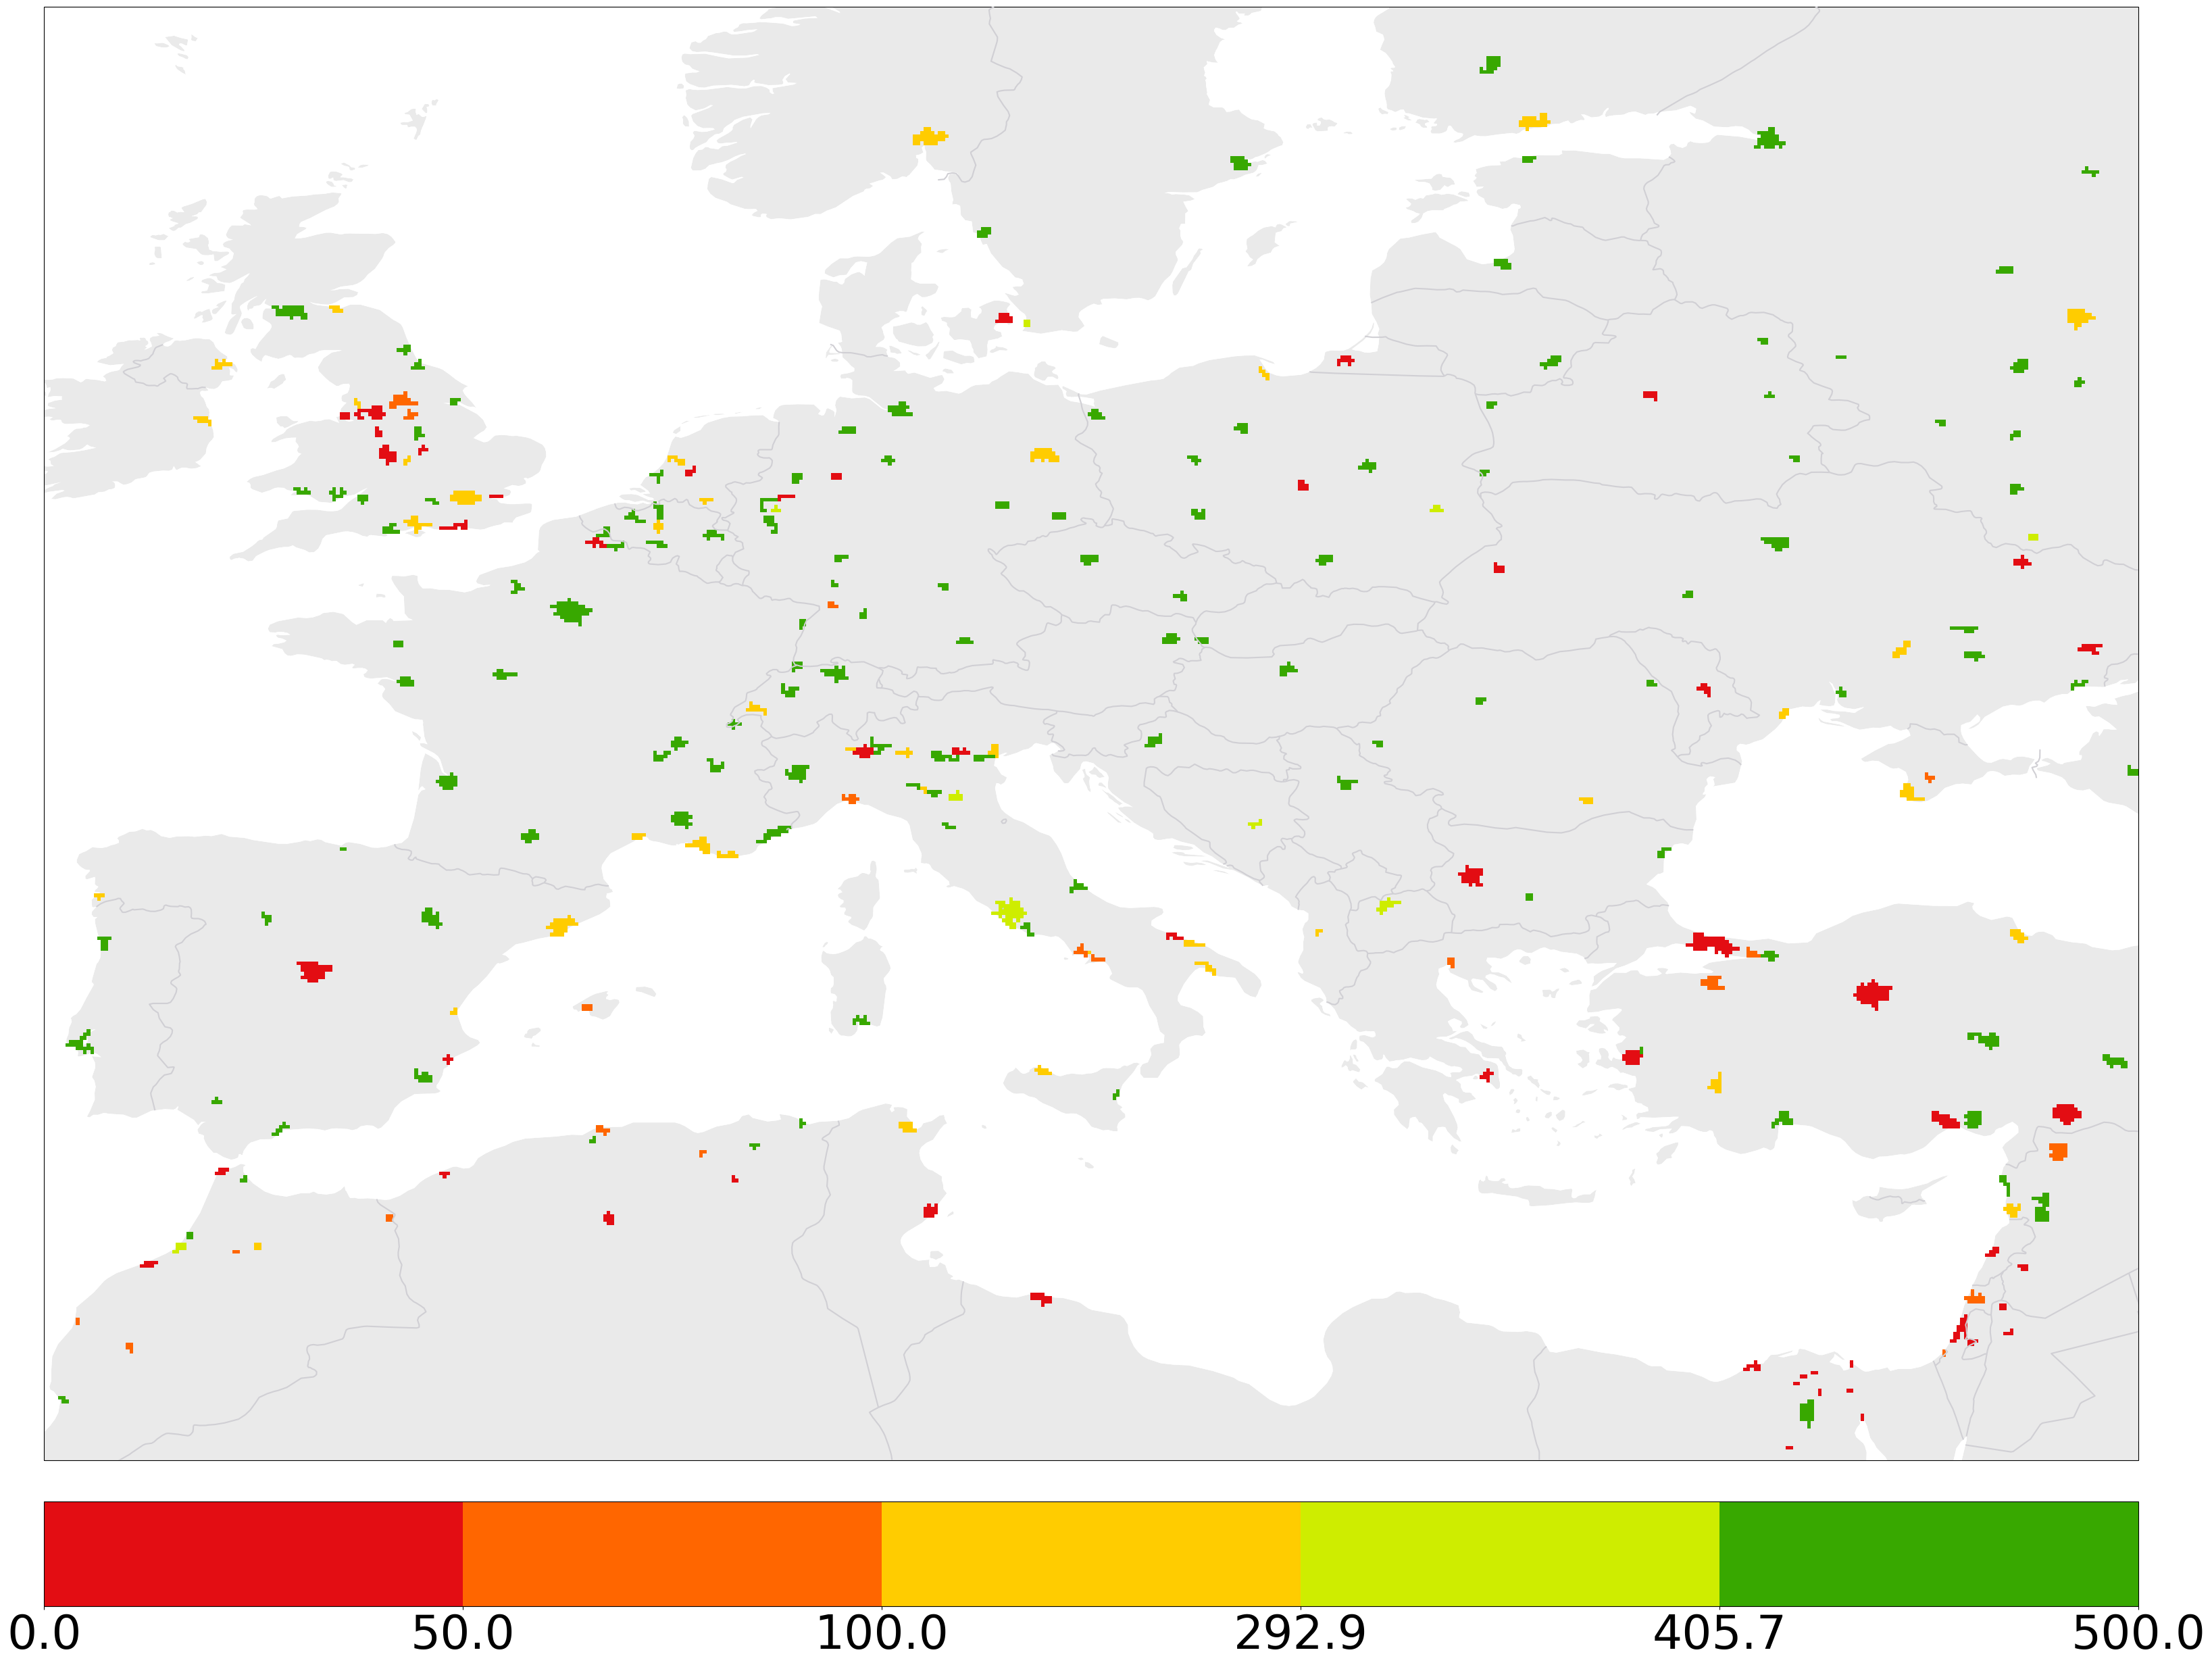

In [76]:
figureone_data = np.load(figureone_savepath)
continent_plot(figureone_data, -10, 39, 29, 63)

# Figure 2.

In [90]:
figure_two = np.zeros((2160, 4320))

for citynum in range(1, 1861):
    if citynum not in invalid_cities:
        inl_ind = np.where(inlet==citynum)
        aqd_one_ind = np.where(aqd_one==citynum)
        aqd_two_ind = np.where(aqd_two==citynum)
        aqd_three_ind = np.where(aqd_three==citynum)
        aqd_four_ind = np.where(aqd_four==citynum)
        ava = np.sum(rivout[inl_ind]) + np.sum(rivout[aqd_one_ind]) + np.sum(rivout[aqd_two_ind]) + np.sum(rivout[aqd_three_ind]) + np.sum(rivout[aqd_four_ind])
        ava_year = ava*60*60*24 # kg/s => little/day
        twenty = ava_year * 0.2
        mask = np.where(cmask==citynum)
        citypop = np.sum(poptot[mask])
        mpcy = twenty/citypop
        figure_two[mask] = mpcy
    else:
        print(f'{citynum} is in invalid_cities')

44 is in invalid_cities
152 is in invalid_cities
158 is in invalid_cities
168 is in invalid_cities
174 is in invalid_cities
225 is in invalid_cities
236 is in invalid_cities
237 is in invalid_cities
278 is in invalid_cities
283 is in invalid_cities
285 is in invalid_cities
310 is in invalid_cities
323 is in invalid_cities
356 is in invalid_cities
393 is in invalid_cities
409 is in invalid_cities
412 is in invalid_cities
422 is in invalid_cities
436 is in invalid_cities
449 is in invalid_cities
474 is in invalid_cities
477 is in invalid_cities
494 is in invalid_cities
500 is in invalid_cities
529 is in invalid_cities
538 is in invalid_cities
544 is in invalid_cities
555 is in invalid_cities
565 is in invalid_cities
572 is in invalid_cities
573 is in invalid_cities
574 is in invalid_cities
578 is in invalid_cities
581 is in invalid_cities
604 is in invalid_cities
623 is in invalid_cities
636 is in invalid_cities
675 is in invalid_cities
682 is in invalid_cities
684 is in invalid_cities
7

In [91]:
figuretwo_savepath = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/erl/out/figure_two.npy'
#np.save(figuretwo_savepath, figure_two)
#print(f'{figuretwo_savepath} is saved')

/mnt/c/Users/tsimk/Downloads/dotfiles/h08/erl/out/figure_two.npy is saved


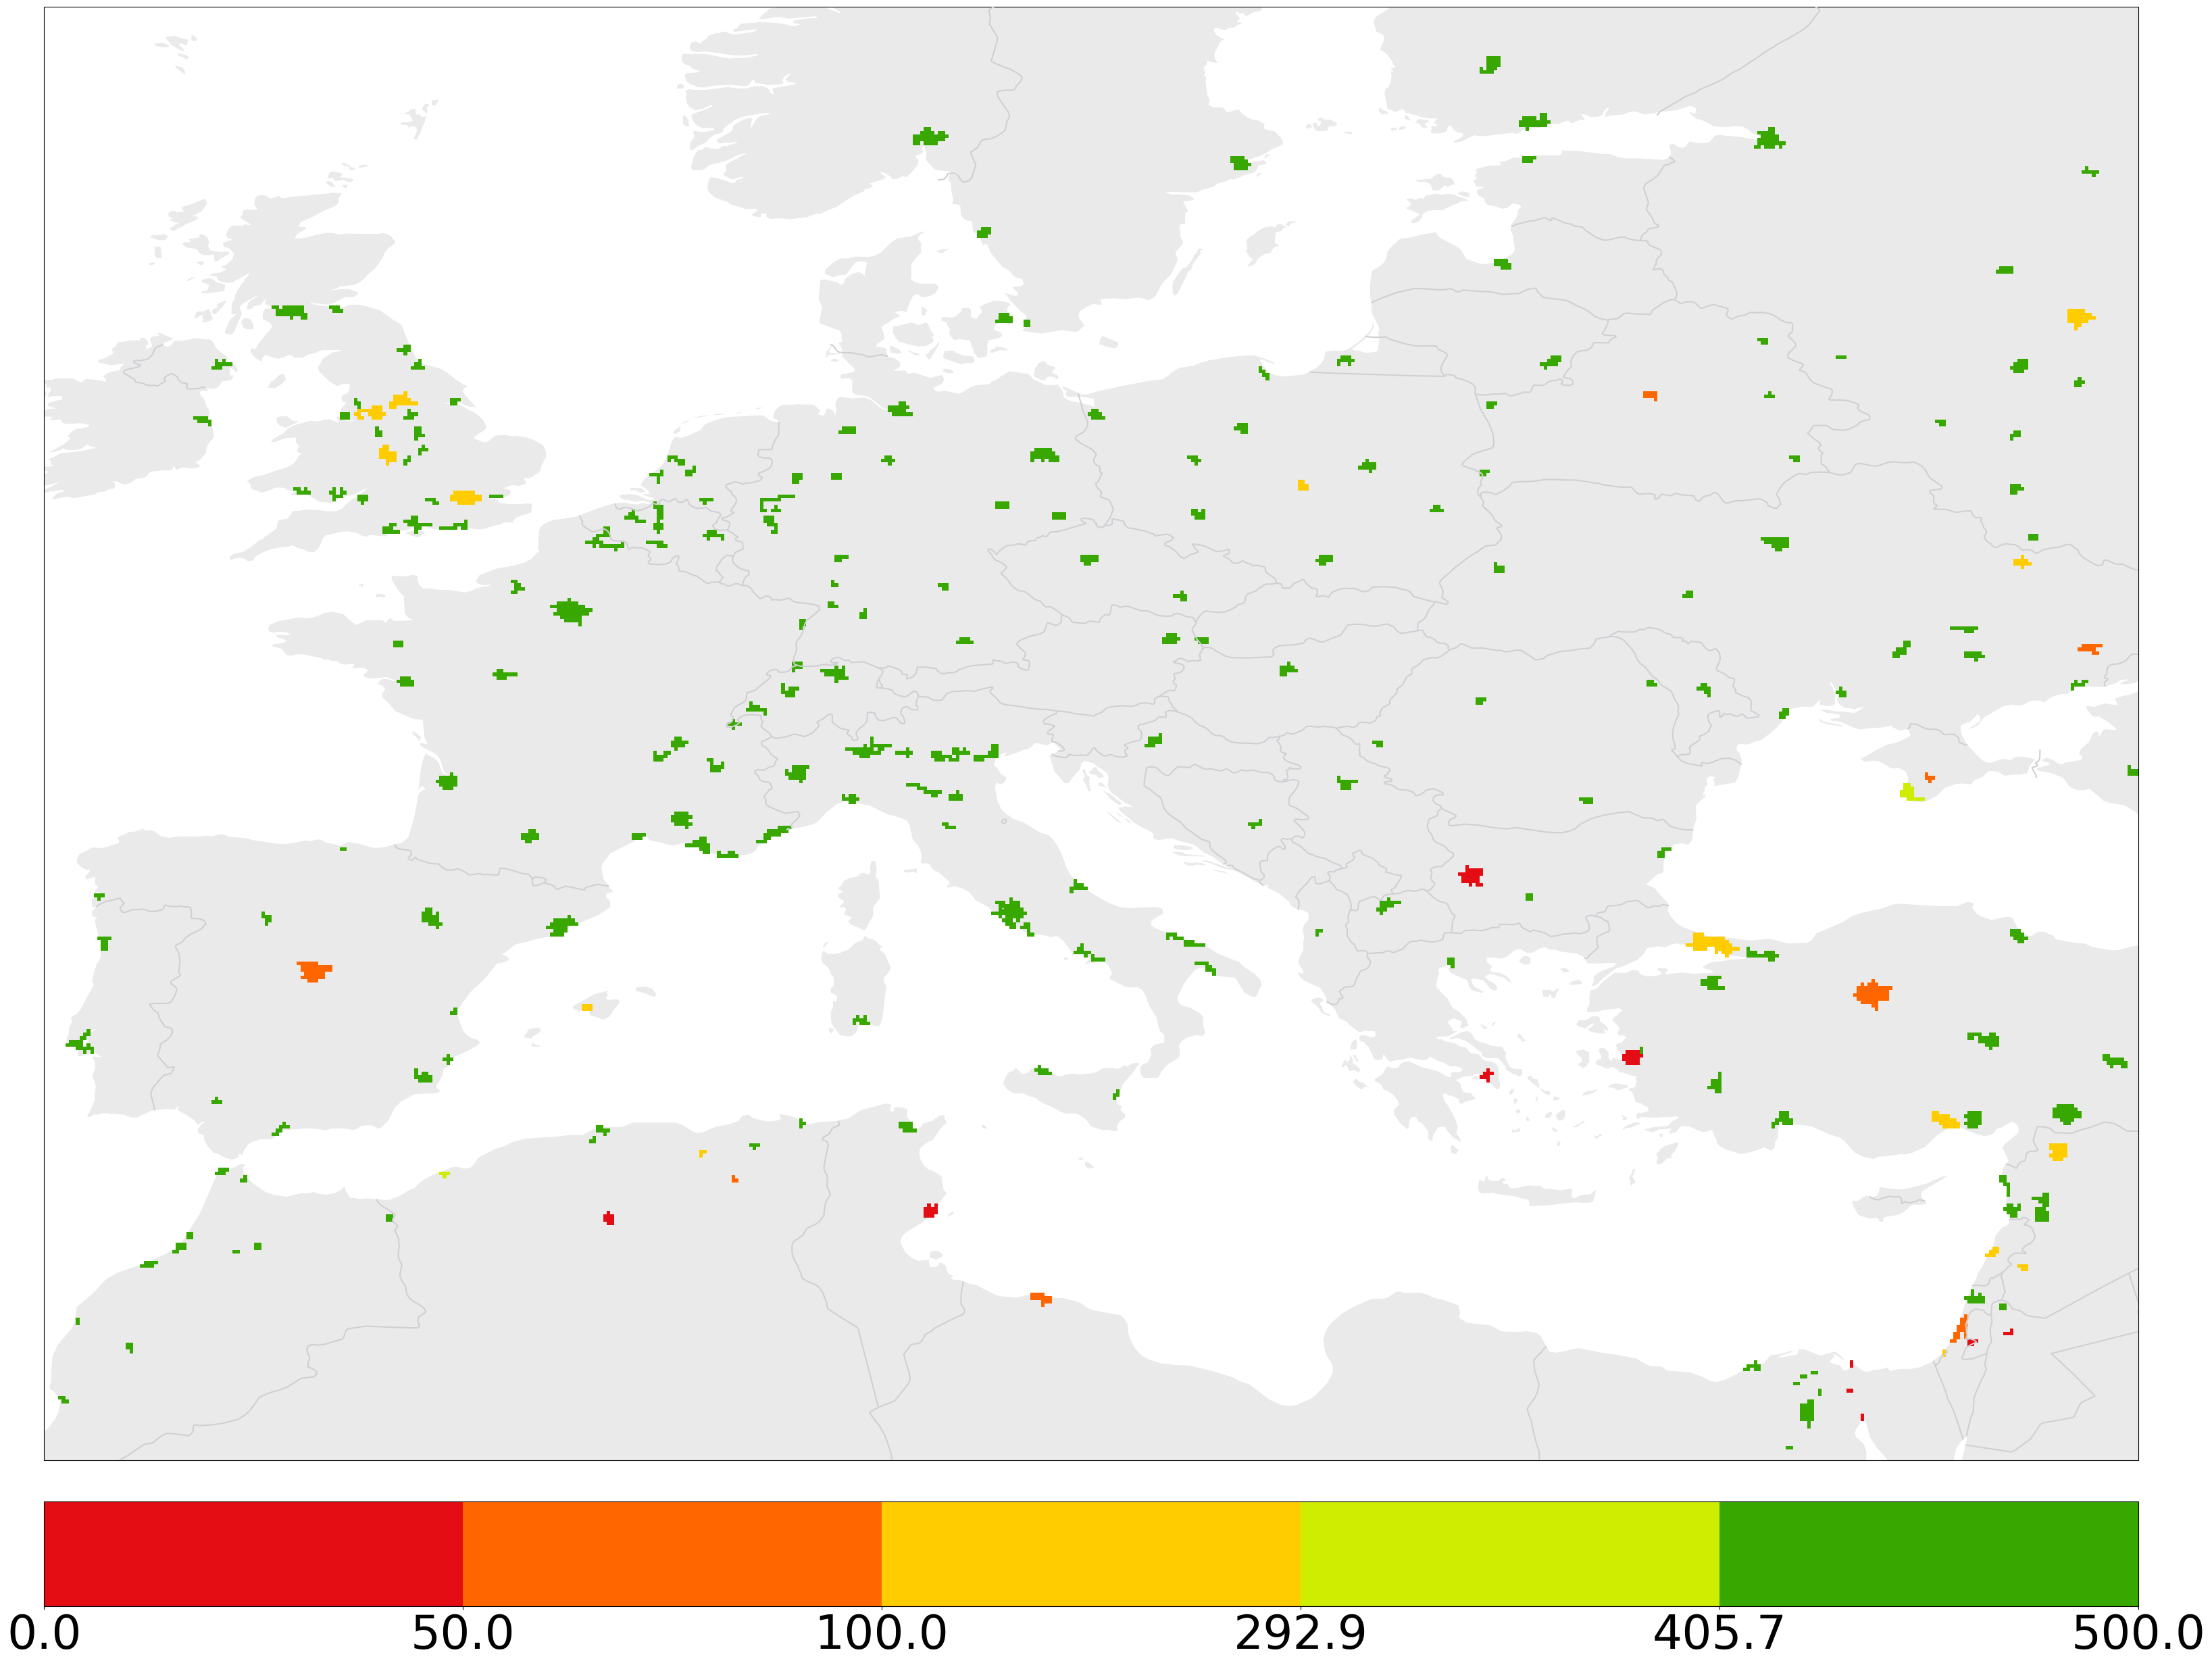

In [92]:
figuretwo_data = np.load(figuretwo_savepath)
continent_plot(figuretwo_data, -10, 39, 29, 63)